In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import random
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

<h4>Упражнение 1</h4>
В упражнении 1 имеется 2 временных ряда, которые связаны вместе. Это также можно интерпретировать как двумерный временной ряд. Для выполнения упражнения 1 требуется просто собрать код из приведенных частей и запустить его.

In [2]:
def generate_x_y_data_v1(seq_length):
    batch_x = []
    batch_y = []

    rand = random.random() * 2 * math.pi
    sig1 = np.sin(
        np.linspace(
            0.0 * math.pi + rand,
            3.0 * math.pi + rand, 
            seq_length * 2
        )
    )
    
    sig2 = np.cos(
        np.linspace(0.0 * math.pi + rand,
                    3.0 * math.pi + rand,
                    seq_length * 2
                   )
    )

    x1 = sig1[:seq_length]
    y1 = sig1[seq_length:]
    x2 = sig2[:seq_length]
    y2 = sig2[seq_length:]

    x_ = np.array([x1, x2])
    y_ = np.array([y1, y2])
    x_, y_ = x_.T, y_.T
        
    batch_x.append(x_)
    batch_y.append(y_)
    
    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    batch_x = np.array(batch_x).transpose((1, 0, 2))
    batch_y = np.array(batch_y).transpose((1, 0, 2))
    return batch_x, batch_y

Формат выходных данных x: (10, 1, 2)
Формат выходных данных y: (10, 1, 2)


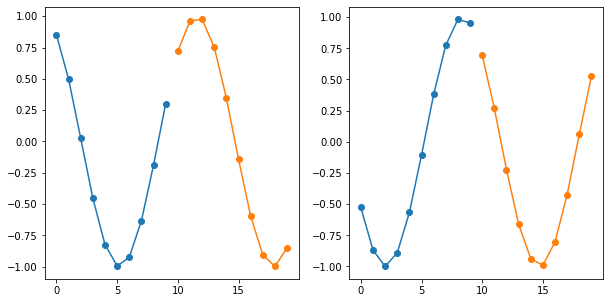

In [17]:
seqLen = 10
xTrain, yTrain = generate_x_y_data_v1(seqLen)
print('Формат выходных данных x:', xTrain.shape)
print('Формат выходных данных y:', yTrain.shape)

plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(seqLen), xTrain.T.reshape((2, seqLen))[0], 'o-')
plt.plot(range(seqLen, seqLen * 2), yTrain.T.reshape((2, seqLen))[0], 'o-')

plt.subplot(1, 2, 2)
plt.plot(range(seqLen), xTrain.T.reshape((2, seqLen))[1], 'o-')
plt.plot(range(seqLen, seqLen*2), yTrain.T.reshape((2, seqLen))[1], 'o-')

In [18]:
model = keras.Sequential()
model.add(layers.GRU(units=200, return_sequences=True, input_shape=(seqLen, 2)))
model.add(layers.GRU(units=100))
model.add(layers.Dense(units=2, activation='tanh'))

model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=0.01),
    loss = keras.losses.MeanAbsoluteError()
)
for i in range(50):
    xTrain, yTrain = generate_x_y_data_v1(seqLen)
    model.fit(xTrain, yTrain, verbose=0)
yPred = model.predict(xTrain)



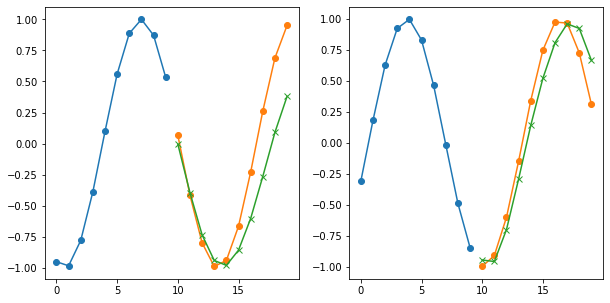

In [51]:
plt.subplots(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(range(seqLen), xTrain.T.reshape((2, seqLen))[0], 'o-')
plt.plot(range(seqLen, seqLen * 2), yTrain.T.reshape((2, seqLen))[0], 'o-')
plt.plot(range(seqLen, seqLen * 2), yPred.T[0], 'x-')

plt.subplot(1, 2, 2)
plt.plot(range(seqLen), xTrain.T.reshape((2, seqLen))[1], 'o-')
plt.plot(range(seqLen, seqLen * 2), yTrain.T.reshape((2, seqLen))[1], 'o-')
plt.plot(range(seqLen, seqLen * 2), yPred.T[1], 'x-')

<h4>Упражнение 2</h4>
В упражнении 2 имеется 1 сигнал, который является суперпозицией двух синусоид с разным периодом и смещением. Чтобы получить корректные предсказания, необходимо изменить гиперпараметры нейронной сети.

In [52]:
def generate_x_y_data_v2(seq_length):
    batch_x = []
    batch_y = []
    
    offset_rand = random.random() * 2 * math.pi
    freq_rand = (random.random() - 0.5) / 1.5 * 15 + 0.5
    amp_rand = random.random() + 0.1
    sig1 = amp_rand * np.sin(
        np.linspace(
            seq_length / 15.0 * freq_rand * 0.0 * math.pi + offset_rand,
            seq_length / 15.0 * freq_rand * 3.0 * math.pi + offset_rand,
            seq_length * 2
        )
    )

    offset_rand = random.random() * 2 * math.pi
    freq_rand = (random.random() - 0.5) / 1.5 * 15 + 0.5
    amp_rand = random . random () * 1.2
    sig1 = amp_rand * np.cos(
        np.linspace(
            seq_length / 15.0 * freq_rand * 0.0 * math.pi + offset_rand,
            seq_length / 15.0 * freq_rand * 3.0 * math.pi + offset_rand,
            seq_length * 2
        )
    ) + sig1 #Суперпозиция или "по-русски" сложение двух функций

    x1 = sig1[:seq_length]
    y1 = sig1[seq_length:]
    x_ = np.array([x1])
    y_ = np.array([y1])
    x_, y_ = x_.T, y_.T
        
    batch_x.append(x_)
    batch_y.append(y_)
    batch_x = np.array(batch_x)
    batch_y = np.array(batch_y)
    
    batch_x = np.array(batch_x).transpose((1, 0, 2))
    batch_y = np.array(batch_y).transpose((1, 0, 2))
    return batch_x, batch_y

Формат выходных данных x: (40, 1, 1)
Формат выходных данных y: (40, 1, 1)


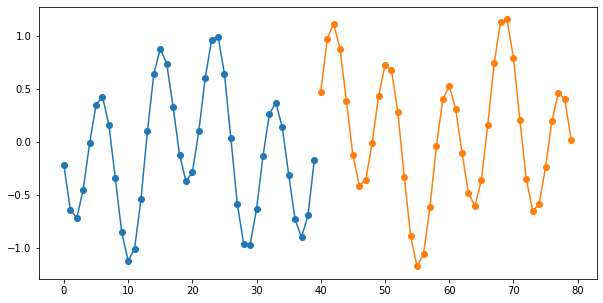

In [54]:
seqLen = 40
x, y = generate_x_y_data_v2(seqLen)
print('Формат выходных данных x:', x.shape)
print('Формат выходных данных y:', y.shape)
x = x.reshape((seqLen))
y = y.reshape((seqLen))

plt.subplots(figsize=(10,5))
plt.plot(range(seqLen), x, 'o-')
plt.plot(range(seqLen, seqLen * 2), y, 'o-')
xTrain, yTrain = generate_x_y_data_v2(seqLen)

In [55]:
model = keras.Sequential()
model.add(layers.GRU(units=200, return_sequences=True, input_shape=(seqLen, 1)))
model.add(layers.GRU(units=100))
model.add(layers.Dense(units=1, activation='tanh'))

model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=0.01),
    loss = keras.losses.MeanAbsoluteError()
)
for i in range(10):
    xTrain, yTrain = generate_x_y_data_v2(seqLen)
    model.fit(xTrain, yTrain, epochs=5, verbose=0)
yPred = model.predict(xTrain)

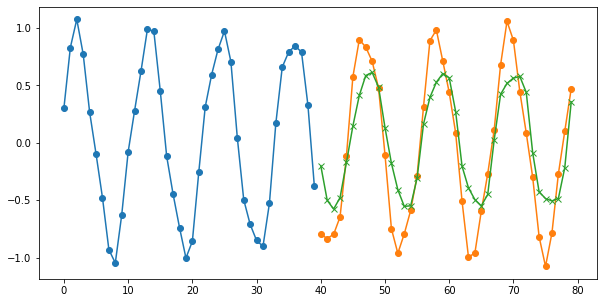

In [56]:
plt.subplots(figsize=(10,5))

plt.plot(range(seqLen), xTrain.T.reshape((1, seqLen))[0], 'o-')
plt.plot(range(seqLen, seqLen * 2), yTrain.reshape(seqLen), 'o-')
plt.plot(range(seqLen, seqLen * 2), yPred, 'x-')

<h4>Упражнение 3</h4>
Упражнение 3 аналогично упражнению 2, однако входные данные зашумлены. Здесь также нужно
будет настроить гиперпараметры нейронной сети, чтобы получить корректные предсказания.

In [63]:
def generate_x_y_data_v3 (seq_length):
    x, y = generate_x_y_data_v2(seq_length )
    noise_amount = random.random() * 0.15 + 0.10
    x = x + noise_amount * np.random.randn(seq_length, 1, 1)
    avg = np.average(x)
    std = np.std(x) + 0.0001
    x = x - avg
    y = y - avg
    x = x / std / 2.5
    y = y / std / 2.5
    return x, y

Формат выходных данных x: (40, 1, 1)
Формат выходных данных y: (40, 1, 1)


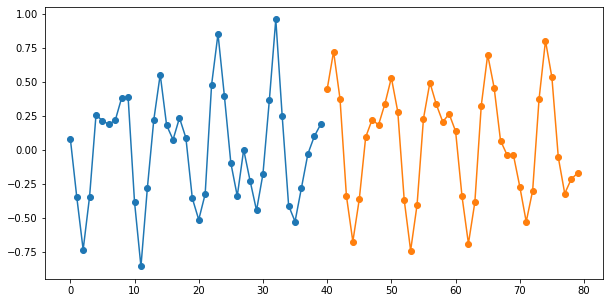

In [64]:
seqLen = 40
x, y = generate_x_y_data_v3(seqLen)
print('Формат выходных данных x:', x.shape)
print('Формат выходных данных y:', y.shape)
x = x.reshape((seqLen))
y = y.reshape((seqLen))

plt.subplots(figsize=(10,5))
plt.plot(range(seqLen), x, 'o-')
plt.plot(range(seqLen, seqLen * 2), y, 'o-')



In [67]:
model = keras.Sequential()
model.add(layers.GRU(units=200, return_sequences=True, input_shape=(seqLen, 1)))
model.add(layers.GRU(units=100))
model.add(layers.Dense(units=1, activation='tanh'))

model.compile(
    optimizer = keras.optimizers.RMSprop(learning_rate=0.01),
    loss = keras.losses.MeanAbsoluteError()
)
for i in range(10):
    xTrain, yTrain = generate_x_y_data_v2(seqLen)
    model.fit(xTrain, yTrain, epochs=5, verbose=0)
yPred = model.predict(xTrain)

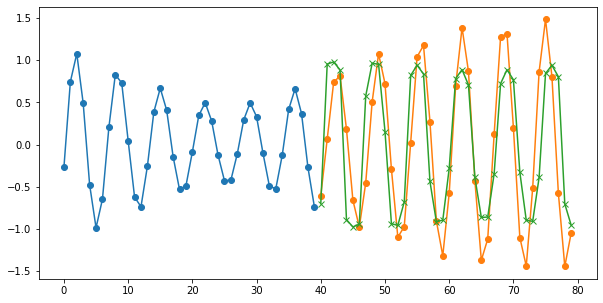

In [68]:
plt.subplots(figsize=(10,5))

plt.plot(range(seqLen), xTrain.T.reshape((1, seqLen))[0], 'o-')
plt.plot(range(seqLen, seqLen * 2), yTrain.reshape(seqLen), 'o-')
plt.plot(range(seqLen, seqLen * 2), yPred, 'x-')